In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=50

In [9]:
dataset =tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size= (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)


# API to get files from the system 

Found 2152 files belonging to 3 classes.


In [10]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [13]:
len(dataset)

68

In [14]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 1 1 0 0 0 0 1 0 1 0 1 1 1 0 2 1 0 1 1 1 1 1 0 1 1 0 1 0 2 0 0]


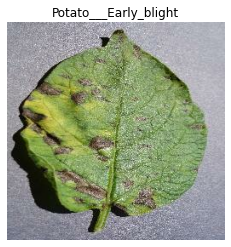

In [15]:
# colour of images are represented in the form of 3D matrix and the individual elements ranging between 0 and 255

# we can get the 3d matrices but we can even see images

for image_batch,label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))  # it was float we converted to integer
    plt.title(class_names[label_batch[0]]) # 0 indicates 1st element, shuffle is on so everytime new image pops up
    plt.axis("off")

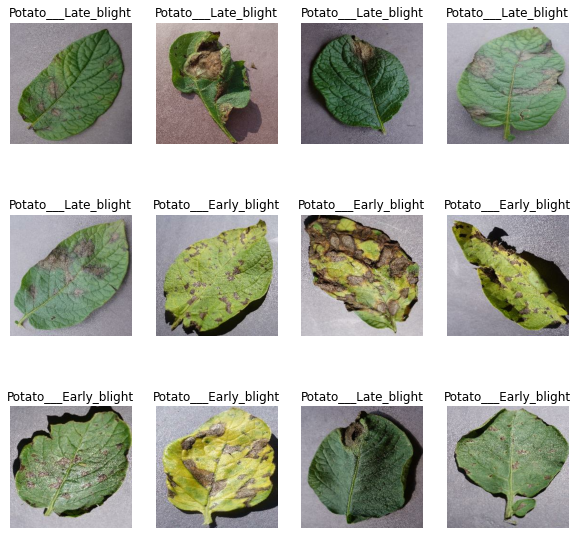

In [18]:
# 12 images are shown
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range (12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))  # it was float we converted to integer
        plt.title(class_names[label_batch[i]]) # 0 indicates 1st element, shuffle is on so everytime new image pops up
        plt.axis("off")

In [26]:
#  80%==> training
#  20%==>10% validation,10% test

In [20]:
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [21]:
train_ds = dataset.take(54)
len(train_ds)

54

In [22]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [23]:
vald_size =0.1
len(dataset)*vald_size

6.800000000000001

In [24]:
vald_ds=test_ds.take(6)
len(vald_ds)

6

In [25]:
test_ds=test_ds.skip(6)
len(test_ds)

8

In [31]:
# this whole batching is done by a function

def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)

    train_ds =ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)

    return train_ds,val_ds,test_ds


In [32]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset)

In [33]:
len(train_ds)

54

In [34]:
len(val_ds)

6

In [35]:
len(test_ds)

8